In [ ]:
#!pip install geopandas

In [152]:
#setting libraries
import pandas as pd
from plotnine import * 
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [18]:
#reading in file
df = pd.read_csv("../data/cleaned_data/final_data.csv")
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']), crs="EPSG:4326")

In [132]:
#dataset of only the opened in 2013
df_13 = df[df["open_year"] == 2013.0]

In [19]:
#reading in geographic data 
america = gpd.read_file('../data/raw_data/county_shape_file')

In [20]:
#list of counties in DMV
dmv_counties = [
    ('11','001'),  # Washington, D.C.
    ('24', '031'),  # Montgomery County, MD
    ('24', '033'),  # Prince George's County, MD
    ('51', '013'),  # Arlington County, VA
    ('51', '059'),  # Fairfax County, VA
    ('51', '600'),   # Falls Church, VA
    ('51', '510')   # Alexandria, VA
]

In [21]:
#filtering for DMV counties
dmv = america[
    america.apply(lambda x: (x['STATEFP'], x['COUNTYFP']) in dmv_counties, axis=1)
]

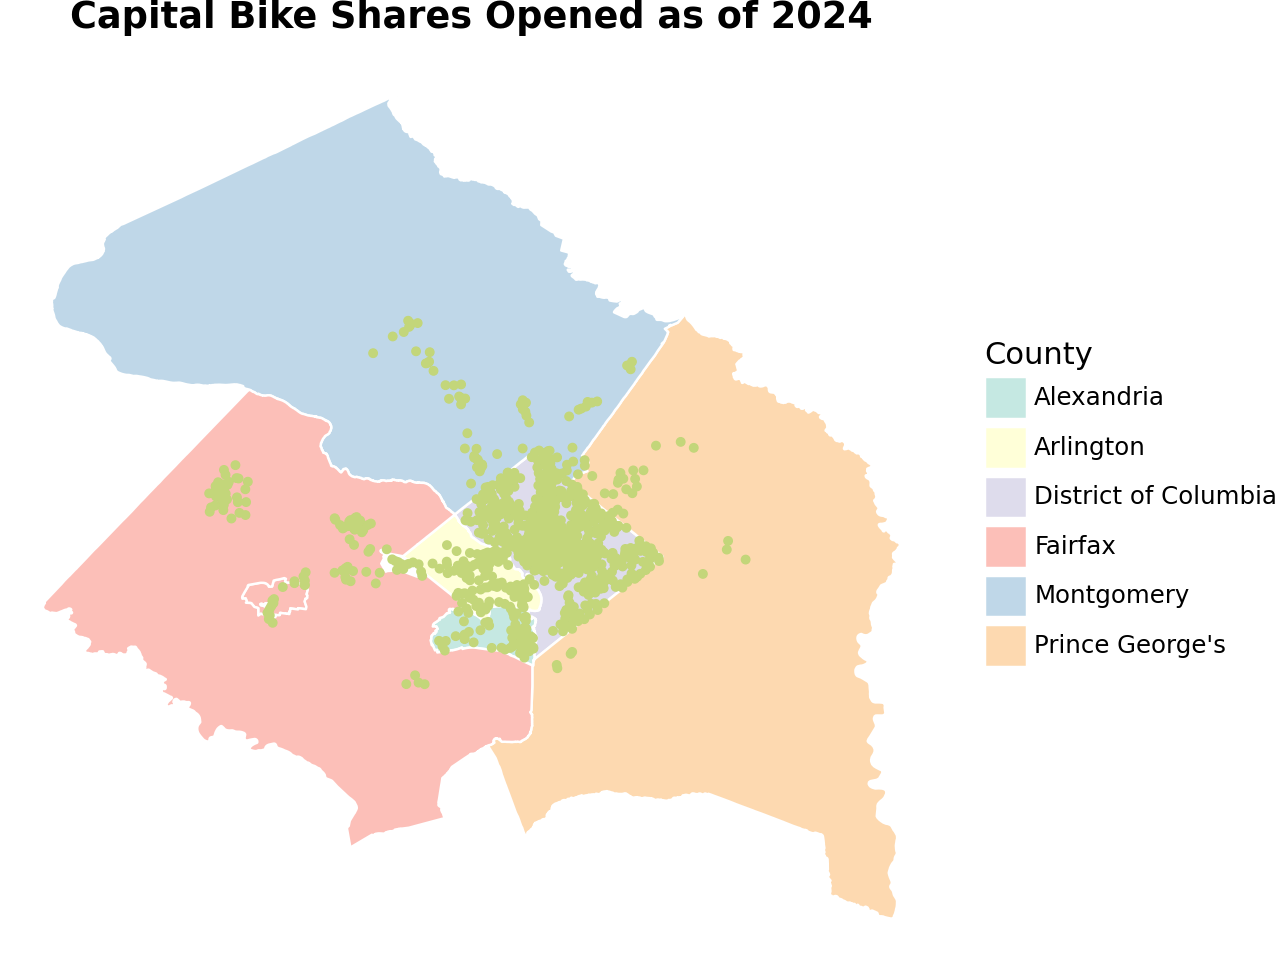

In [169]:
#plot of bikeshares opened as of today
(
ggplot(data = df) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "#c3d67aff",
               fill = "#c3d67aff",
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Capital Bike Shares Opened as of 2024", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    scale_fill_brewer(type="qual", palette="Set3")
)

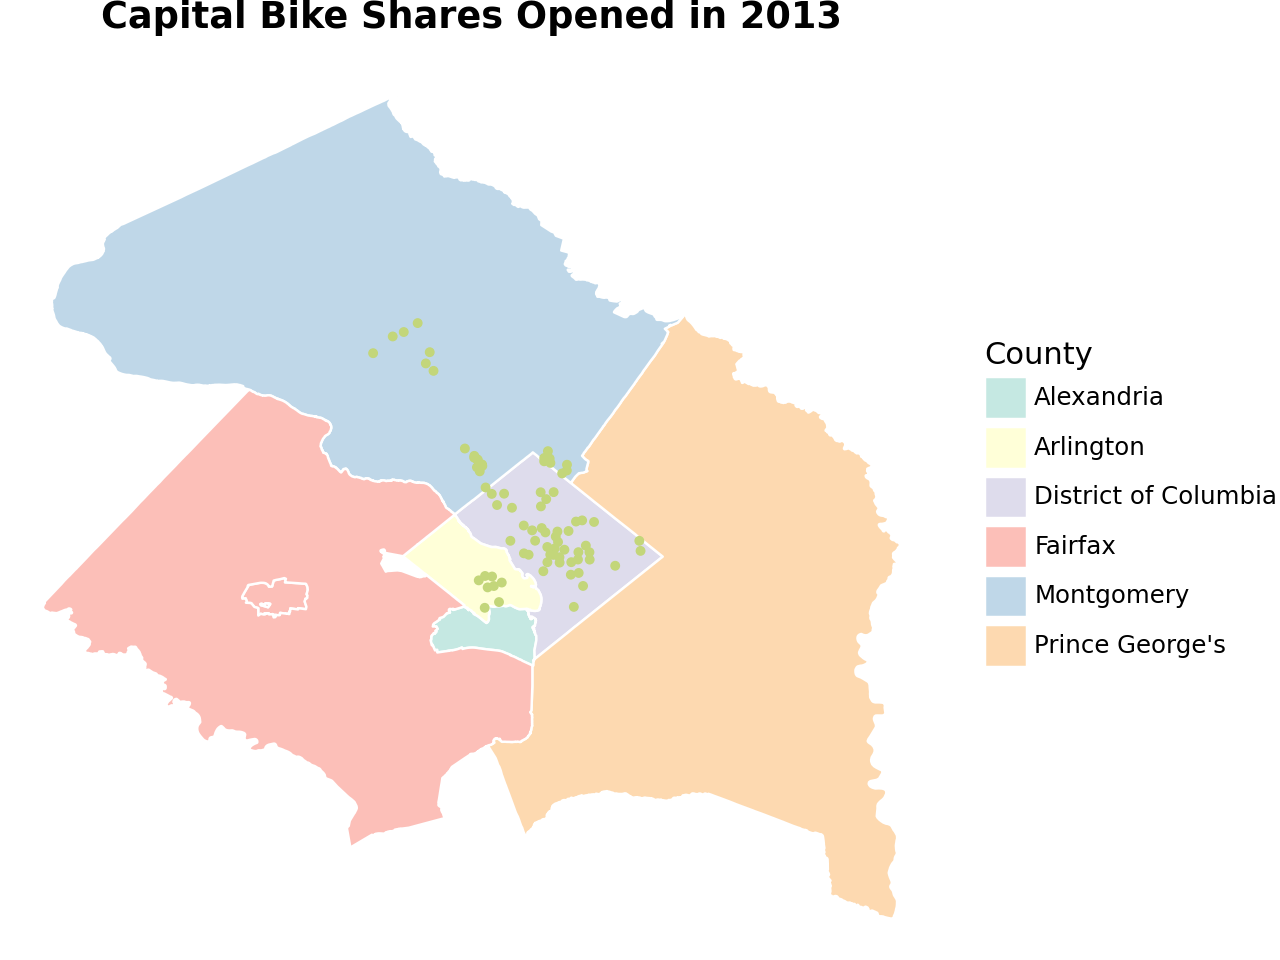

In [170]:
#plot of bikeshares opened in 2013
(
ggplot(data = df_13) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "#c3d67aff",
               fill = "#c3d67aff",
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Capital Bike Shares Opened in 2013", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    scale_fill_brewer(type="qual", palette="Set3")
)

In [72]:
#turned from wide to long
df_13_traffic = df_13.melt(id_vars=['id', 'long', 'lat', 'open_year', 'name', 'opened_station', 'opened_2013'], var_name = "year", value_name = "aadt")

In [77]:
#treat year as category
df_13_traffic['year'] = df_13_traffic['year'].astype('category')

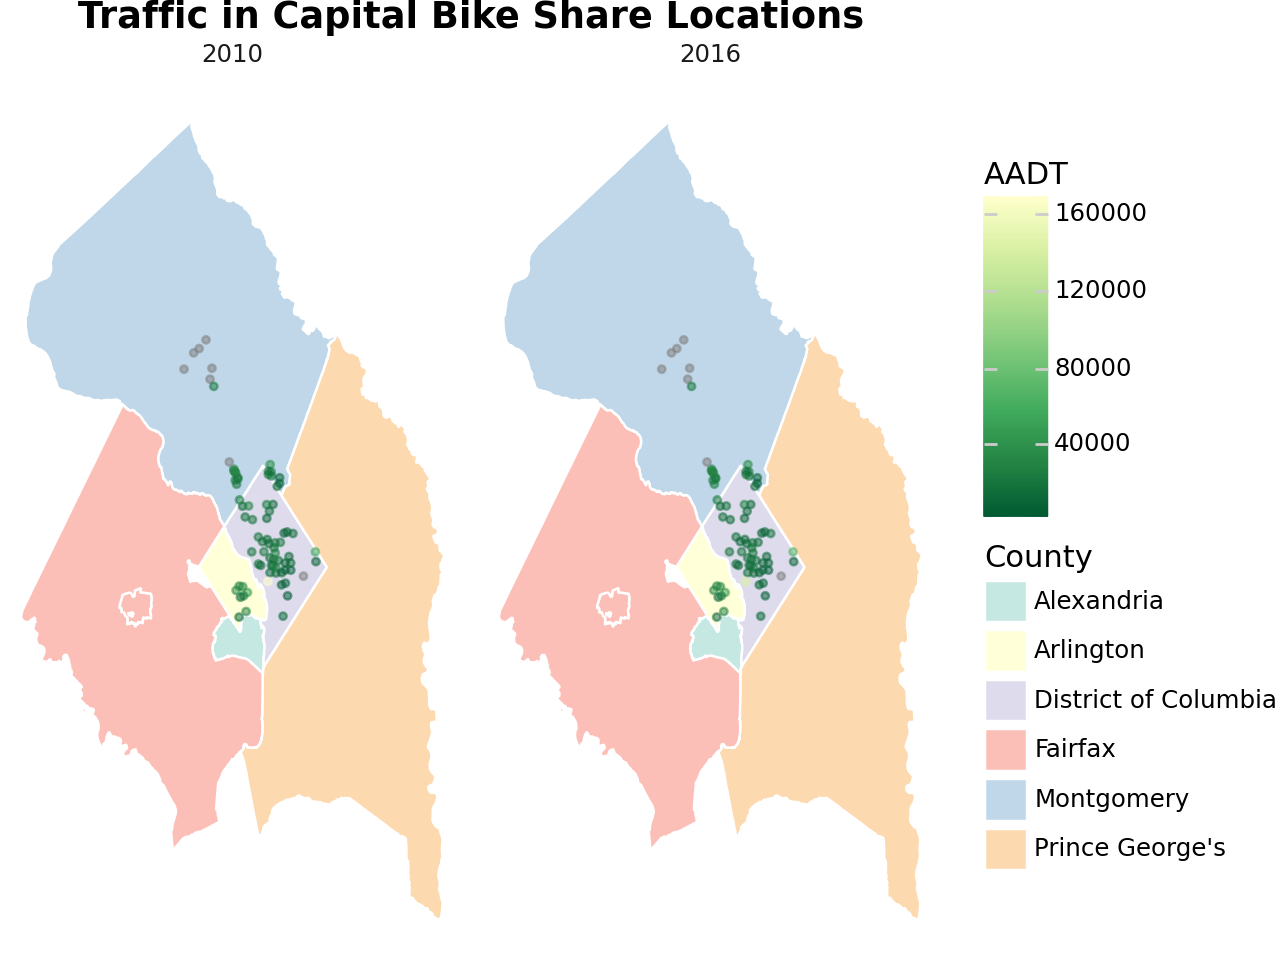

In [145]:
#plot of bikeshares opened in 2013 colored by traffic volume 
(
ggplot(data = df_13_traffic[df_13_traffic['year'].isin(["2010", "2016"])]) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "aadt"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Traffic in Capital Bike Share Locations", fill = "County", color = "AADT") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    facet_grid('~year') +
    scale_color_distiller(type="seq", palette="YlGn") +
    scale_fill_brewer(type="qual", palette="Set3")
)

In [155]:
#computing change in aadt
df_13["change"] = (df_13["2010"]-df_13["2016"])/df_13["2010"] * 100

C:\Users\helen\AppData\Local\Temp\ipykernel_13724\2073753238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


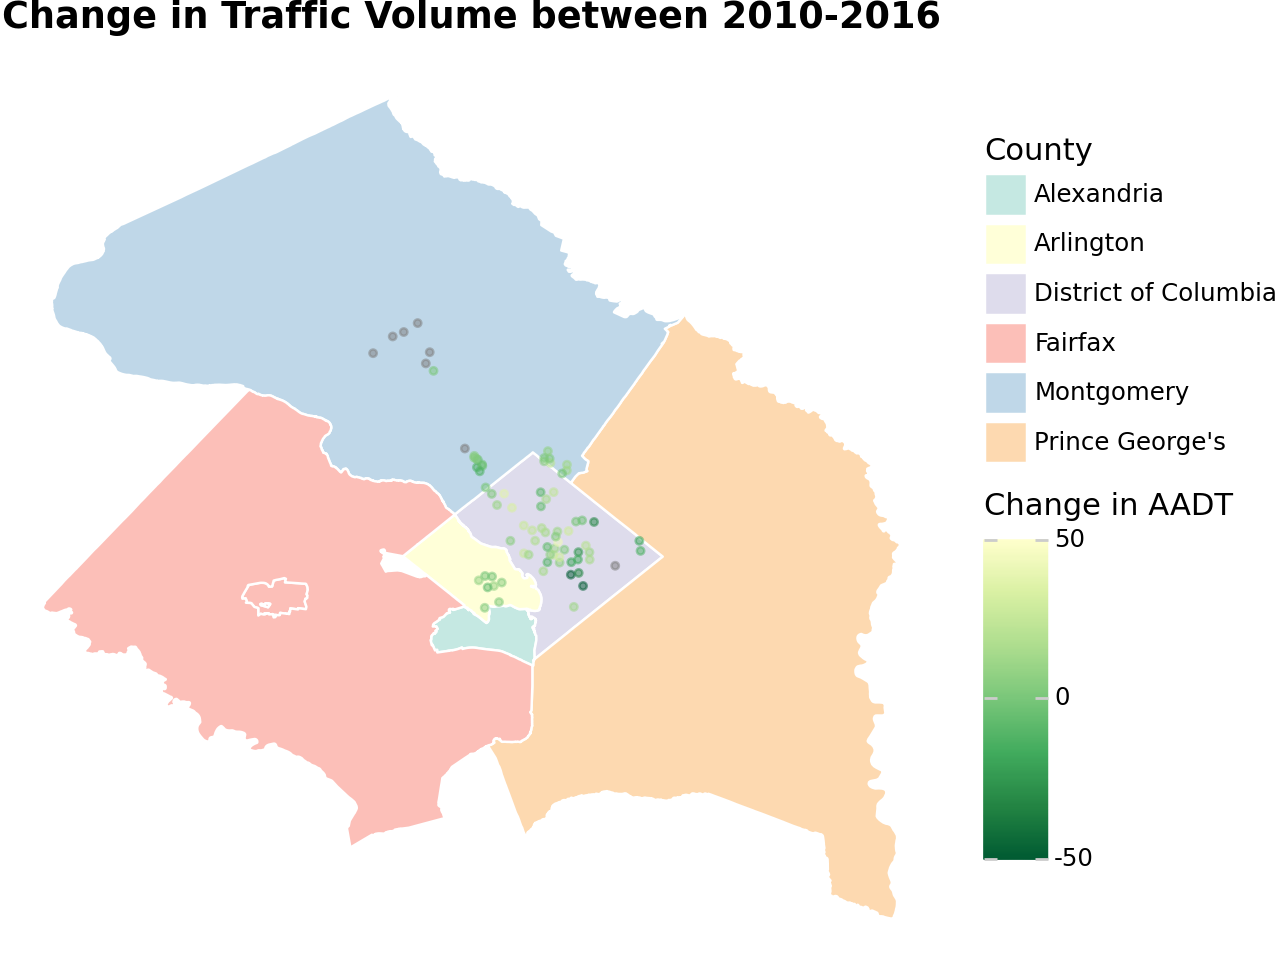

In [173]:
#plot of proposed, unopened bikeshares 
(
ggplot(data = df_13) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "change"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Change in Traffic Volume between 2010-2016", fill = "County",
        color = "Change in AADT") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3") +
    scale_color_distiller(type="seq", palette="YlGn",
                        limits=(-50, 50),
                         breaks=[-50, 0, 50])
)

In [64]:
#getting stations that are unopened
proposed = df[df["opened_station"] == 0]

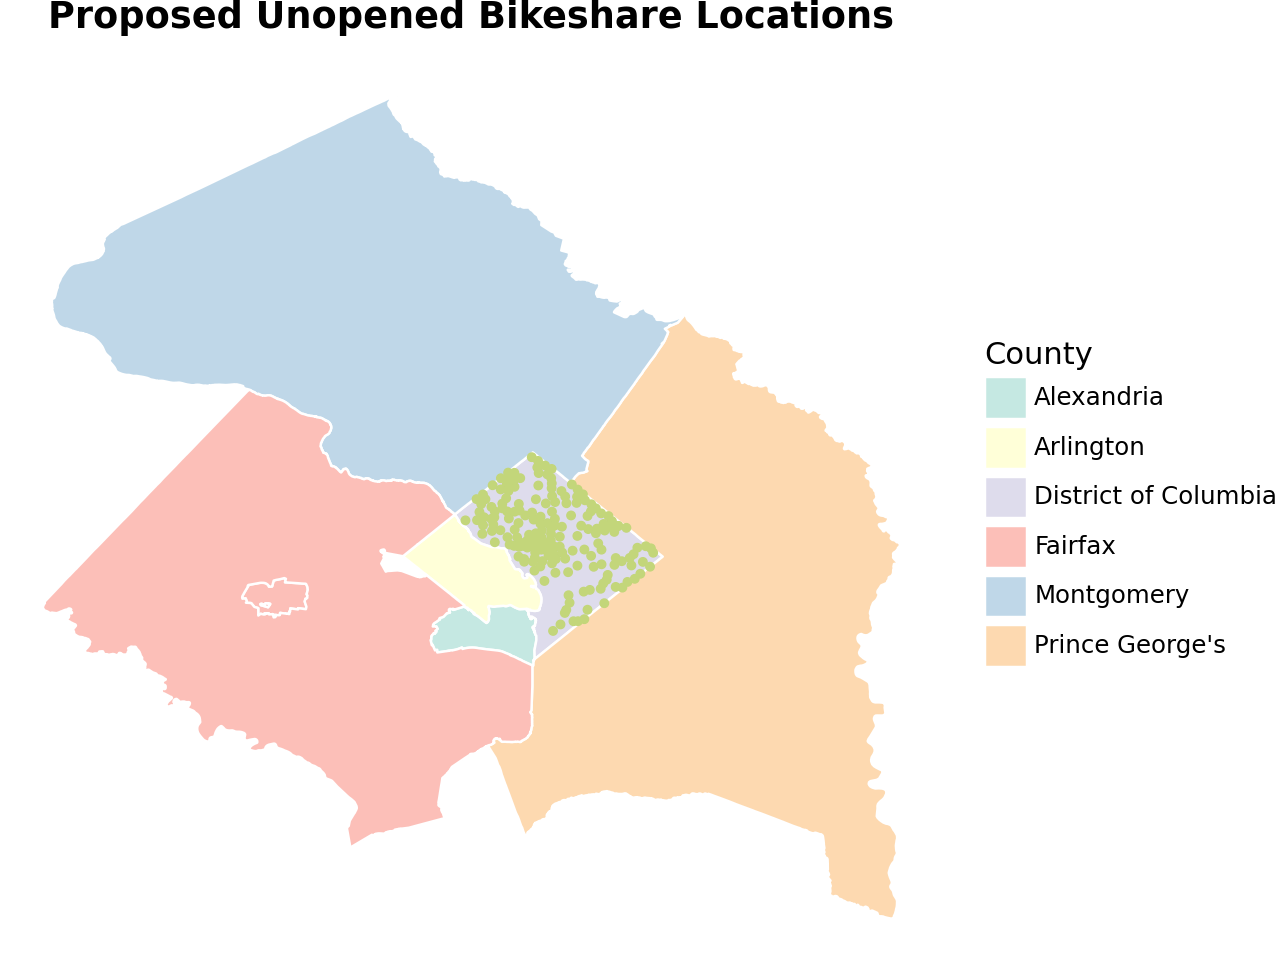

In [172]:
#plot of proposed, unopened bikeshares 
(
ggplot(data = proposed) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "#c3d67aff",
               fill = "#c3d67aff",
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Proposed Unopened Bikeshare Locations", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3")
)

In [168]:
df_13

,id,long,lat,open_year,name,2010,2011,2012,2013,2014,2015,2016,opened_station,opened_2013,pre,change
3,082544b7-1f3f-11e7-bf6b-3863bb334450,-77.077078,38.943837,2013.0,39th & Veazey St NW,16736.666667,16823.000000,17252.666667,16876.000000,17190.000000,17311.666667,14909.000000,1,True,10.920135,10.920135
20,08256e7b-1f3f-11e7-bf6b-3863bb334450,-77.026141,38.887332,2013.0,Independence Ave & L'Enfant Plaza SW/DOE,14210.444444,12654.444444,13117.111111,14776.888889,15654.222222,14928.300000,15726.100000,1,True,-10.665786,-10.665786
21,0825756e-1f3f-11e7-bf6b-3863bb334450,-77.092210,38.983838,2013.0,Montgomery Ave & Waverly St,22067.600000,22666.800000,23600.600000,23488.800000,23461.200000,22585.000000,22596.800000,1,True,-2.398086,-2.398086
34,0825b27e-1f3f-11e7-bf6b-3863bb334450,-77.100239,38.990639,2013.0,Norfolk & Rugby Ave,31712.000000,30030.000000,29791.000000,29852.000000,29010.000000,29761.000000,30332.000000,1,True,4.351665,4.351665
50,0825b8f0-1f3f-11e7-bf6b-3863bb334450,-77.050046,38.923583,2013.0,Calvert St & Woodley Pl NW,20007.500000,20111.000000,19929.500000,15320.333333,14888.500000,14009.400000,14377.800000,1,True,28.137948,28.137948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0825bce9-1f3f-11e7-bf6b-3863bb334450,-77.109647,38.999634,2013.0,Old Georgetown Rd & Southwick St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,NaN,NaN
763,082553a7-1f3f-11e7-bf6b-3863bb334450,-76.995193,38.889988,2013.0,8th & East Capitol St NE,6991.750000,6506.375000,6442.875000,7348.444444,7770.000000,7941.727273,8106.909091,1,True,-15.949642,-15.949642
764,08259804-1f3f-11e7-bf6b-3863bb334450,-77.029350,38.990249,2013.0,East West Hwy & Blair Mill Rd,17294.000000,16077.750000,15950.000000,15988.500000,16162.500000,16595.500000,16925.250000,1,True,2.132242,2.132242
769,0825b10b-1f3f-11e7-bf6b-3863bb334450,-77.011210,38.975000,2013.0,Carroll & Westmoreland Ave,10312.500000,10361.500000,10610.500000,10645.000000,9947.000000,9983.333333,10416.333333,1,True,-1.006869,-1.006869
